In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import webbrowser
import os

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anami\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
#loading the dataset
app_df=pd.read_csv('Play Store Data.csv')
rev_df=pd.read_csv('User Reviews.csv')

In [12]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
rev_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [14]:
#data cleaning
app_df = app_df.dropna(subset=['Rating'])
for column in app_df.columns:
    app_df[column].fillna(app_df[column].mode()[0], inplace=True)
app_df.drop_duplicates(inplace=True)
app_df = app_df[app_df['Rating'] <= 5]
rev_df.dropna(subset=['Translated_Review'], inplace=True)

C:\Users\anami\AppData\Local\Temp\ipykernel_6820\2394693742.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df[column].fillna(app_df[column].mode()[0], inplace=True)


In [15]:
# Merging datasets on App 
merged_df = pd.merge(app_df, rev_df, on='App', how='inner')

In [16]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.6+ KB


In [17]:
#data tranformation
#convverting reviews to integers 
app_df['Reviews'] = app_df['Reviews'].str.replace(',', "")

#cleaning installs col
app_df['Installs'] = app_df['Installs'].astype(str).str.replace(',', '').str.replace('+', '').str.strip()
app_df['Installs'] = pd.to_numeric(app_df['Installs'], errors='coerce').fillna(0).astype(int)

# coverting price col to float
app_df['Price'] = app_df['Price'].astype(str).str.replace('$', '').str.strip()
app_df['Price'] = pd.to_numeric(app_df['Price'], errors='coerce').fillna(0.0).astype(float)

In [18]:
# converting to mb so that data will be uniformed 
def converting_size(size):
    size = str(size)
    if "M" in size:
        return float(size.replace("M", ""))
    elif "k" in size:
        return float(size.replace("k", "")) / 1024
    else:
        return np.nan 

app_df['Size'] = app_df['Size'].apply(converting_size)

In [19]:
app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'], errors='coerce')

TASK 1 

In [20]:
paid_apps = app_df[app_df['Type'] == 'Paid'].copy()
paid_apps = paid_apps.dropna(subset=['Installs', 'Price'])

In [21]:
paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']
paid_apps = paid_apps.dropna(subset=['Category'])

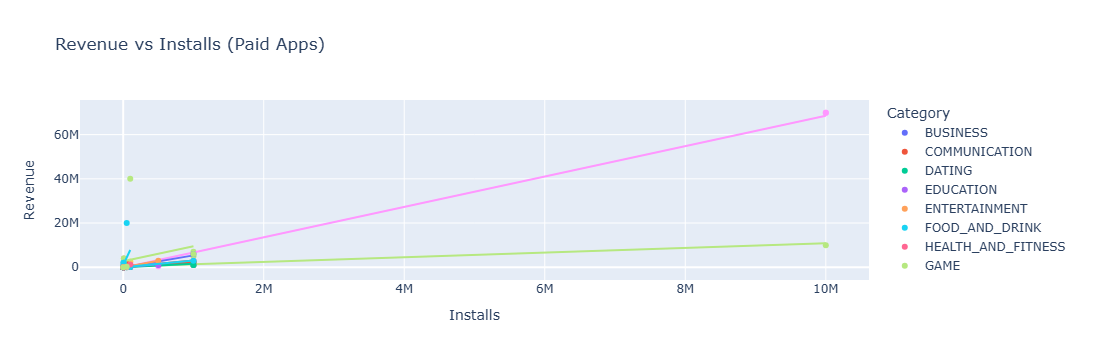

<Figure size 1400x800 with 0 Axes>

In [64]:
#scatter plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

fig1 = px.scatter(
    paid_apps ,
    x='Installs',
    y='Revenue',
    color='Category',
    title='Revenue vs Installs (Paid Apps)',
    trendline="ols"
)
fig1.show()
fig1.write_image("images/scatter_plot.png", format="png")

TASK 2

In [43]:
from datetime import datetime
def is_time_between(start_hour, end_hour):
    now = datetime.now().time()
    start = datetime.strptime(f"{start_hour}", "%H").time()
    end = datetime.strptime(f"{end_hour}", "%H").time()
    return start <= now <= end

In [44]:
#filtering data
filtered_df = app_df[
    (app_df['Rating'] >= 4.0) &(app_df['Size'] >= 10) &(app_df['Last Updated'].dt.month == 1)]

#grouping 
category_stats = filtered_df.groupby('Category').agg({'Rating': 'mean','Reviews': 'sum','Installs': 'sum'}).reset_index()
top_categories = category_stats.sort_values(by='Installs', ascending=False).head(10)

In [45]:
melted = pd.melt(top_categories,
    id_vars='Category',
    value_vars=['Rating', 'Reviews'],
    var_name='Metric',
    value_name='Value'
)

In [63]:
if is_time_between(15, 17):  # 3 PM to 5 PM
    grouped['Avg_Rating'] = grouped['Avg_Rating'].astype(float)
    grouped['Total_Reviews'] = grouped['Total_Reviews'].astype(float)

    fig2 = px.bar(
        grouped,
        x='Category',
        y=['Avg_Rating', 'Total_Reviews'],
        barmode='group',
        title='Top Categories: Avg Rating & Reviews'
    )

    fig2.show()

else:
    print('Graph can only be seen between 3–5 PM !!!!')

fig2.write_image("images/grouped_piechart.png",format= "png")

Graph can only be seen between 3–5 PM !!!!


TASK 3

In [56]:
#correcting datatypes
app_df['App'] = app_df['App'].astype(str)
app_df['Reviews'] = pd.to_numeric(app_df['Reviews'], errors='coerce')
app_df['Rating'] = pd.to_numeric(app_df['Rating'], errors='coerce')
app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'], errors='coerce')

filtered_df = app_df[
    app_df['App'].str.contains('C', case=False, na=False) &    
    (app_df['Reviews'] >= 10) &                                
    (app_df['Rating'] < 4.0)                                     
]

category_counts = filtered_df['Category'].value_counts()
valid_categories = category_counts[category_counts > 50].index
filtered_df = filtered_df[filtered_df['Category'].isin(valid_categories)]

In [69]:
if is_time_between(16, 18):
    
    fig3 = px.violin(
        violin_df,
        x='Category',
        y='Rating',
        box=True,
        points='all',
        title='Rating Distribution by Category (Violin Plot)'
    )

    fig3.show()  
    fig3.write_image("images/violin_plot.png") 

else:
    print("Graph can only be seen between 4–6 PM !!!!")

Graph can only be seen between 4–6 PM !!!!


In [79]:
image_folder = "images"
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# Save each plotly figure as PNG
def save_plot_as_png(fig, filename):
    filepath = os.path.join(image_folder, filename)
    fig.write_image(filepath)


In [80]:
plot1_html = fig1.to_html(full_html=False, include_plotlyjs='cdn')  
plot2_html = fig2.to_html(full_html=False, include_plotlyjs=False)  
plot3_html = fig3.to_html(full_html=False, include_plotlyjs=False)  

In [87]:
dashboard_html = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Playstore Dashboard</title>
    <meta charset="utf-8">
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f5f5f5;
            padding: 20px;
        }}
        h1 {{
            text-align: center;
            margin-bottom: 40px;
        }}
        .plot-container {{
            margin: 30px 0;
            background: white;
            padding: 20px;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
            border-radius: 10px;
        }}
    </style>
</head>
<body>
    <h1>Interactive Google Playstore Dashboard By Shrista </h1>
    <div class="plot-container">{plot1_html}</div>
    <div class="plot-container">{plot2_html}</div>
    <div class="plot-container">{plot3_html}</div>
</body>
</html>
"""

In [88]:
output_file = "Playstore_Dashboard.html"
with open(output_file, "w", encoding="utf-8") as f:
    f.write(dashboard_html)

In [89]:
webbrowser.open('file://' + os.path.realpath(output_file))

True